In [1]:
import accumodel
# accumodel.set_estimator(accumodel.estimators.OptimizeEstimator(accumodel.models.WaldAntiStopFixedThres))
accumodel.set_estimator(accumodel.estimators.OptimizeEstimator(accumodel.models.WaldAntiStop))

/Users/mlm2/anaconda/envs/pythontwo/lib/python2.7/site-packages/IPython/parallel.py:13: ShimWarning: The `IPython.parallel` package has been deprecated. You should import from ipyparallel instead.
  "You should import from ipyparallel instead.", ShimWarning)


Initializing random numbers as (10000, 3)


# Fits to data sets

In [2]:
import pandas as pd
import hddm

# Flanker Depressed

In [49]:
# get the subjects who should who should be included. 
clin_data = pd.read_csv('/Users/mlm2/Work/Expts/EMBARC/Data/Flanker/Processed/EMBARC_Flk_Clin_s1_Mar-16-1002AM-2017.csv')
use = clin_data[clin_data.flanker_qc == 1]
subs_to_use = use.ProjectSpecificID.unique()


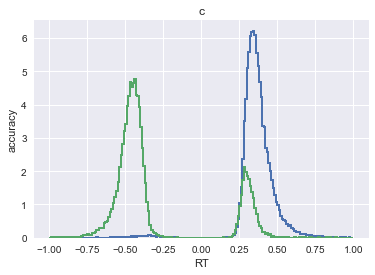

In [71]:
# load in the data and put it in the correct format for ddm
data = pd.read_csv('/Users/mlm2/Work/Expts/EMBARC/Data/Flanker/Processed/EMBARC_Flk_DDM_Clin_s1_Mar-16-1002AM-2017.csv')
data['rt'] /= 1000.
data['response'] = data.accuracy
data['subj_idx'] = data.ProjectSpecificID
data['conf'] = False
data['cond'] = 'incong'
data.loc[data.stimulus == 'CON', 'cond'] = 'cong'
data.loc[data.cond == 'incong', 'conf'] = True

data = hddm.utils.flip_errors(data)
data.ix[data.conf, 'rt'] *= -1
data = data.loc[data.ProjectSpecificID.isin(subs_to_use)] # remove the people who should be excluded based on qc fails

# make a plot of the RT distributions (this looks very similar to the 2015 one)
# error RTs are plotted as negative
# blue seems to be congruent, green seems to be incongruent
import seaborn as sns
% matplotlib inline 
ax = sns.plt.subplot(1, 1, 1, xlabel='RT', ylabel='accuracy', title='c')
data.ix[data.cond == 'cong', 'rt'].hist(bins=200, histtype='step', range=(-1, 1), normed=True, lw=2, ax=ax);
(data.ix[data.cond == 'incong', 'rt']).hist(bins=200, histtype='step', range=(-1, 1), normed=True, lw=2, ax=ax);

In [ ]:
# make one dataframe of everyone's parameter estimates; this takes FOREVER
param_df = pd.DataFrame()
for sub in data.subj_idx.unique():
    sub_params = accumodel.models.estimate_subj((sub, data), estimate_kwargs=None)
    sub_params_df = pd.concat([pd.DataFrame(sub_params).T])
    param_df = param_df.append(sub_params_df)

#res_dep_df = res_dep_df.join(data_dep[['subj_idx', 'session']].groupby(['subj_idx', 'session']).first())
param_df.to_csv('fits_flanker6.csv', index=True)

-442276.614187


In [31]:
# this is taking forever but not killing anything? Will let it run overnight and see what it's like in the morning. 
# Update: yes it works it just takes a while. Not sure what that -470437 number is though. 

k = accumodel.models.estimate_subj(('CU0009', data), estimate_kwargs=None)

-470437.146898
Optimization terminated successfully.
         Current function value: -100430.012508
         Iterations: 12
         Function evaluations: 1099
x = [ 0.12153187  1.60339436  6.36376307  8.49605859  7.94790143  0.14307928]
t              t
a              a
v_pro      v_pro
v_stop    v_stop
v_anti    v_anti
t_anti    t_anti
Name: knode_name, dtype: object
OrderedDict([('t', (0, 0.5)), ('a', (0.5, 3.5)), ('v_pro', (0, 5.0)), ('v_stop', (0, 5.0)), ('v_anti', (0, 5.0)), ('t_anti', (0, 0.5))])
prop = [ 0.13225806  1.47159709  5.77715016  8.36013448  7.04172926  0.18756249]
Optimization terminated successfully.
         Current function value: -100593.147200
         Iterations: 7
         Function evaluations: 615
at minima -100593.1472 accepted 1
('minima =', array([ 0.14197739,  1.41049074,  6.0993029 ,  8.3897837 ,  7.27783658,
        0.13198656]))
x = [ 0.14197739  1.41049074  6.0993029   8.3897837   7.27783658  0.13198656]
t              t
a              a
v_pro      v

In [33]:
k.head(10)

t         0.145390
a         1.373153
v_pro     6.020767
v_stop    8.360788
v_anti    7.292016
t_anti    0.134353
Name: CU0009, dtype: float64

In [36]:
m = k

In [37]:
m

t         0.145390
a         1.373153
v_pro     6.020767
v_stop    8.360788
v_anti    7.292016
t_anti    0.134353
Name: CU0009, dtype: float64

In [38]:
k_df = pd.concat([pd.DataFrame(k).T])

In [40]:
m_df = pd.concat([pd.DataFrame(m).T])

In [39]:
k_df

,t,a,v_pro,v_stop,v_anti,t_anti
CU0009,0.14539,1.373153,6.020767,8.360788,7.292016,0.134353


In [41]:
mk = k_df.append(m_df)
mk

#res_dep_df = pd.concat([pd.DataFrame(r).T for r in res_dep])
#res_dep_df = res_dep_df.join(data_dep[['subj_idx', 'session']].groupby(['subj_idx', 'session']).first())

res_dep_df.to_csv('fits_flanker6.csv', index=True)

,t,a,v_pro,v_stop,v_anti,t_anti
CU0009,0.14539,1.373153,6.020767,8.360788,7.292016,0.134353
CU0009,0.14539,1.373153,6.020767,8.360788,7.292016,0.134353


In [21]:
# this is taking forever but not killing anything? Will let it run overnight and see what it's like in the morning. 

for sub in data.subj_idx.unique():
    k = accumodel.models.estimate_subj((sub, data), estimate_kwargs=None)

-470437.146898


KeyboardInterrupt: 

# CBT Flanker

In [ ]:
fnames = !ls ~wiecki/working/projects/hddm_data/cbt_flanker/*.csv
dfs = []
for fname in fnames:
    pre_post = fname[-5:-4]
    df = pd.read_csv(fname)
    df['pre_post'] = pre_post
    dfs.append(df)

data = pd.concat(dfs)
data = data.query('outlier != 1')
data['rt'] /= 1000.
data['response'] = data.accuracy
data['subj_idx'] = data.subject
data['conf'] = False
data['cond'] = 'incong'
data.loc[data.stimulus == 'CON', 'cond'] = 'cong'
data.loc[data.cond == 'incong', 'conf'] = True
data = hddm.utils.flip_errors(data)
data.ix[data.conf, 'rt'] *= -1

data = data.loc[data.rab_lam != 0]
#import seaborn as sns
ax = plt.subplot(1, 1, 1, xlabel='RT', ylabel='accuracy', title=c)
data.ix[data.cond == 'cong', 'rt'].hist(bins=200, histtype='step', range=(-1, 1), normed=True, lw=2, ax=ax);
(data.ix[data.cond == 'incong', 'rt']).hist(bins=200, histtype='step', range=(-1, 1), normed=True, lw=2, ax=ax);

# res_dep = view.map_sync(lambda x: accumodel.models.estimate_subj(x, depends_on={'a': 'conf'}), 
#                         data.groupby('ProjectSpecificID'))
res_dep = view.map_sync(lambda x: accumodel.models.estimate_subj(x, depends_on={'a': 'rab_lam'}), 
                        data.groupby(['subj_idx', 'pre_post']))
res_dep_df = pd.concat([pd.DataFrame(r).T for r in res_dep])
#res_dep_df = res_dep_df.join(data_dep[['subj_idx', 'session']].groupby(['subj_idx', 'session']).first())
res_dep_df.to_csv('fits_bhp_thresh.csv', index=True)

# Tourette Simon

In [ ]:
from scipy.io import loadmat

fnames = !ls ~wiecki/working/projects/hddm_data/tourette/Cued\ Simon/*.mat
dfs = []
for fname in fnames:
    mat = loadmat(fname)['data_block']
    df = pd.DataFrame(mat, columns=['trial_id', 'stimulus', 'response', 'rt', 'accuracy'])
    df['subj_idx'] = int(fname.split('/')[-1][:fname.split('/')[-1].find('_')])
    dfs.append(df)
    
data = pd.concat(dfs)
data = data.query('accuracy != -1')
data['conf'] = data.stimulus.apply(str).apply(lambda x: x[-3]) == '2'
data['response'] = data.accuracy
data['cond'] = 'cong'
data.loc[data.conf, 'cond'] = 'incong'
data = hddm.utils.flip_errors(data)
data.ix[data.conf, 'rt'] *= -1
import seaborn as sns
ax = plt.subplot(1, 1, 1, xlabel='RT', ylabel='accuracy', title=c)
data.ix[data.cond == 'cong', 'rt'].hist(bins=200, histtype='step', range=(-1, 1), normed=True, lw=2, ax=ax);
(data.ix[data.cond == 'incong', 'rt']).hist(bins=200, histtype='step', range=(-1, 1), normed=True, lw=2, ax=ax);

res = view.map_sync(lambda x: accumodel.models.estimate_subj(x), 
                        data.groupby('subj_idx'))
res_df = pd.concat([pd.DataFrame(r).T for r in res_dep])

res_df.to_csv('fits_simon_tourette.csv', index=True)

In [ ]:
data = pd.read_csv('EMBARC_Flk_DDM_Clin_s1_Jun-25-0210PM-2014.csv')
data['rt'] /= 1000.
data['response'] = data.accuracy
data['subj_idx'] = data.ProjectSpecificID
data['conf'] = False
data['cond'] = 'incong'
data.loc[data.stimulus == 'CON', 'cond'] = 'cong'
data.loc[data.cond == 'incong', 'conf'] = True

data = hddm.utils.flip_errors(data)
data.ix[data.conf, 'rt'] *= -1
data = data.loc[~data.ProjectSpecificID.isin(['CU0017', 'CU0025', 'MG0007', 'TX0037', 'TX0050', 'TX0068', 'TX0101','UM0037', 'UM0056', ' MG0049'])]

import seaborn as sns
ax = plt.subplot(1, 1, 1, xlabel='RT', ylabel='accuracy', title=c)
data.ix[data.cond == 'cong', 'rt'].hist(bins=200, histtype='step', range=(-1, 1), normed=True, lw=2, ax=ax);
(data.ix[data.cond == 'incong', 'rt']).hist(bins=200, histtype='step', range=(-1, 1), normed=True, lw=2, ax=ax);

In [ ]:
# res_dep = view.map_sync(lambda x: accumodel.models.estimate_subj(x, depends_on={'a': 'conf'}), 
#                         data.groupby('ProjectSpecificID'))
res_dep = view.map_sync(lambda x: accumodel.models.estimate_subj(x), 
                        data.groupby('subj_idx'))
res_dep_df = pd.concat([pd.DataFrame(r).T for r in res_dep])
#res_dep_df = res_dep_df.join(data_dep[['subj_idx', 'session']].groupby(['subj_idx', 'session']).first())
res_dep_df.to_csv('fits_bhp.csv', index=True)

In [ ]:
res_dep_df

In [ ]:
# res_dep = view.map_sync(accumodel.models.estimate_subj, data_dep.groupby(['subj_idx', 'session']))
# res_dep_df = pd.concat([pd.DataFrame(r).T for r in res_dep])
# res_dep_df = res_dep_df.join(data_dep[['subj_idx', 'session']].groupby(['subj_idx', 'session']).first())
# res_dep_df.to_csv('fits_depression_no_thresh.csv', index=True)